In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ecommerce_sales_data (2).csv')

In [3]:
df.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


# Problem Understanding

## Target = Profit
## Type = Regression

In [4]:
df.shape

(3500, 7)

In [5]:
df.columns

Index(['Order Date', 'Product Name', 'Category', 'Region', 'Quantity', 'Sales',
       'Profit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


In [7]:
df.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [8]:
df.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

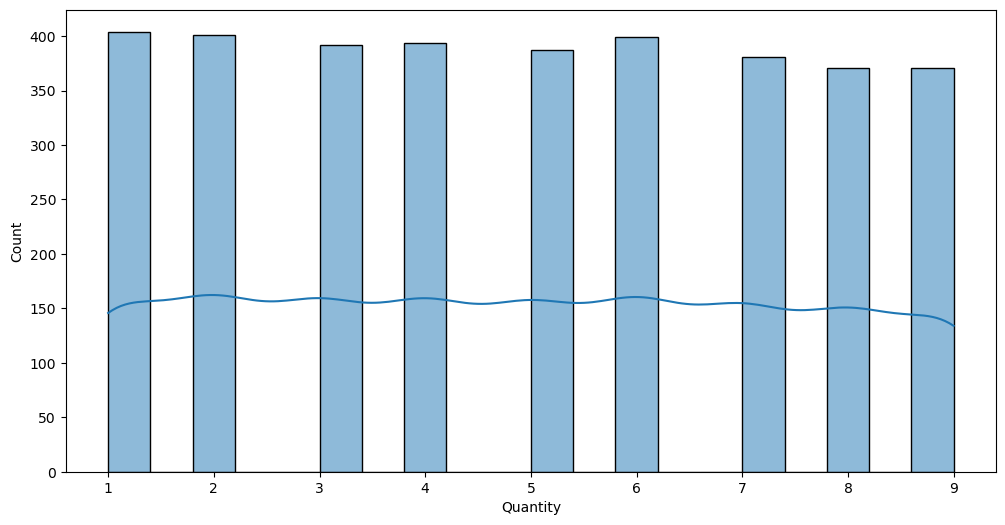

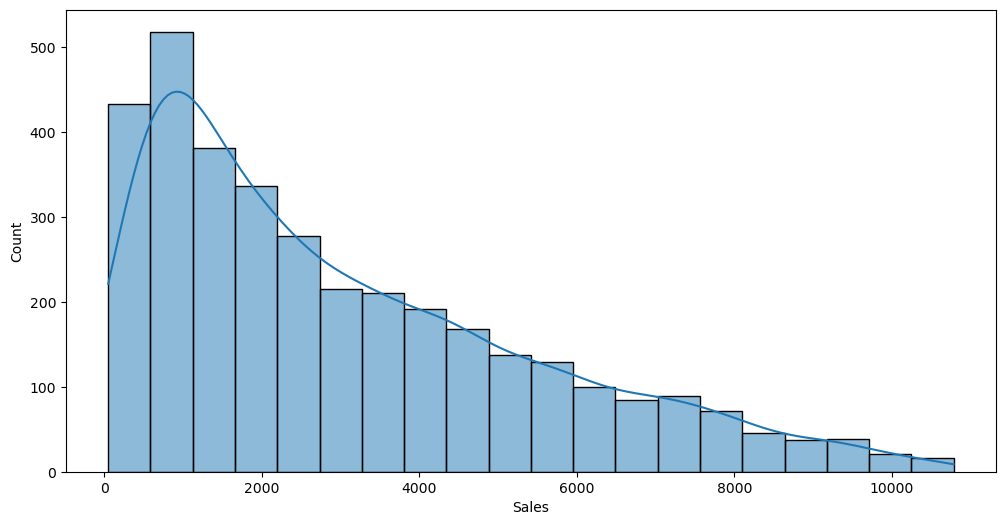

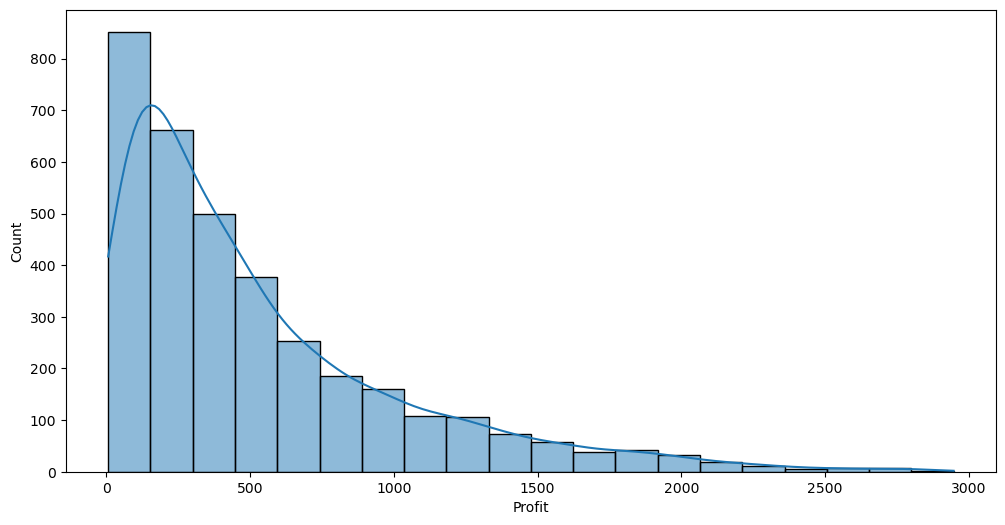

In [10]:
num = ['Quantity', 'Sales','Profit']

for i in num:
    plt.figure(figsize = (12, 6))
    sns.histplot(df[i], kde = True, bins = 20)

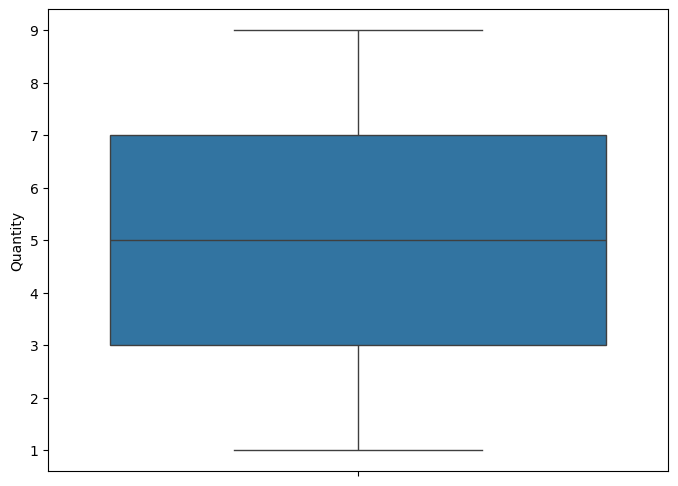

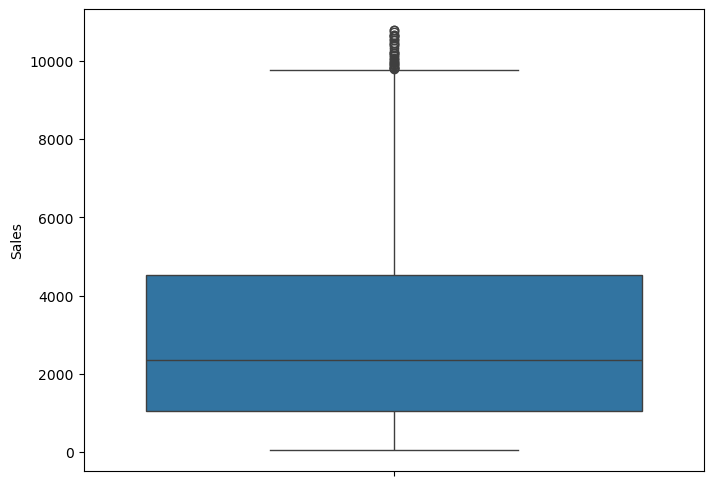

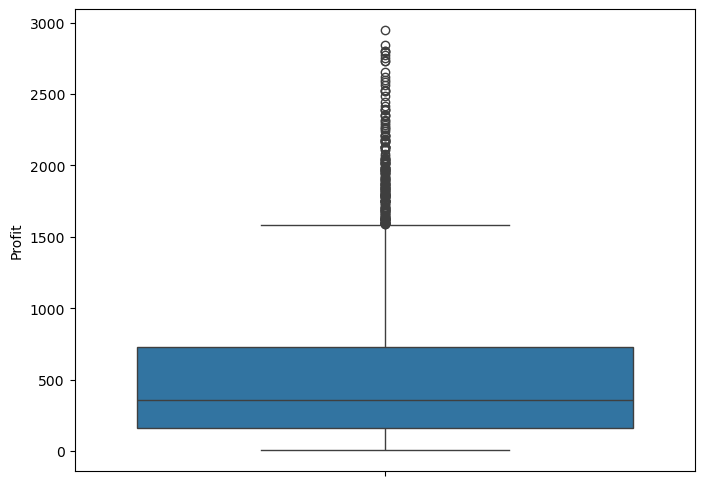

In [11]:
for i in num:
    plt.figure(figsize = (8,6))
    sns.boxplot(df[i])

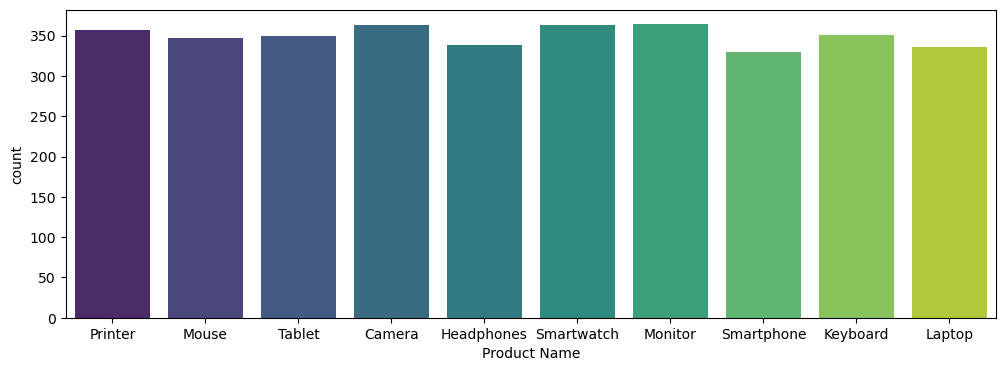

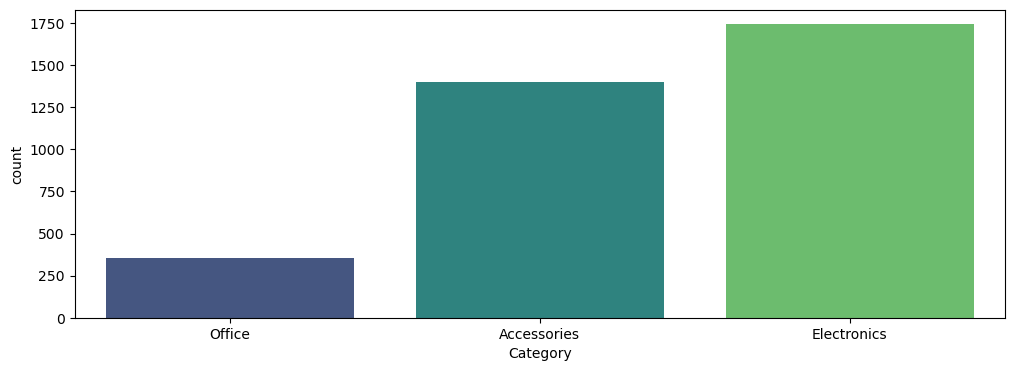

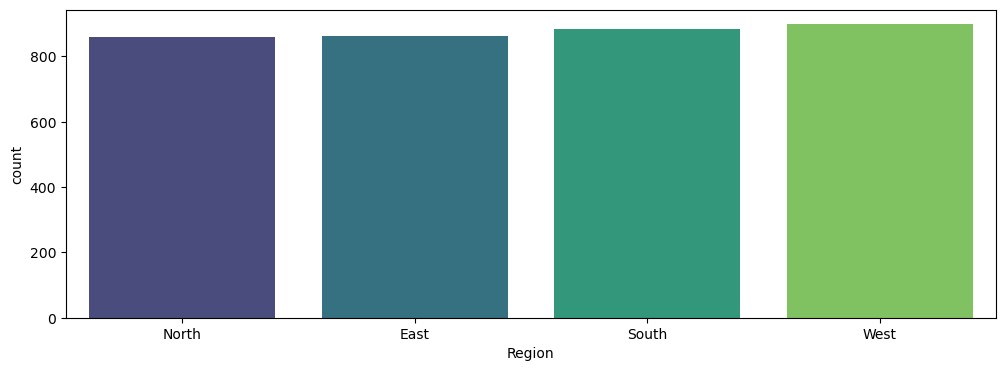

In [12]:
categoricalCol = ['Product Name', 'Category', 'Region']

for i in categoricalCol:
    plt.figure(figsize = (12,4))
    sns.countplot(x = df[i], palette = 'viridis')
    plt.show()

<Axes: >

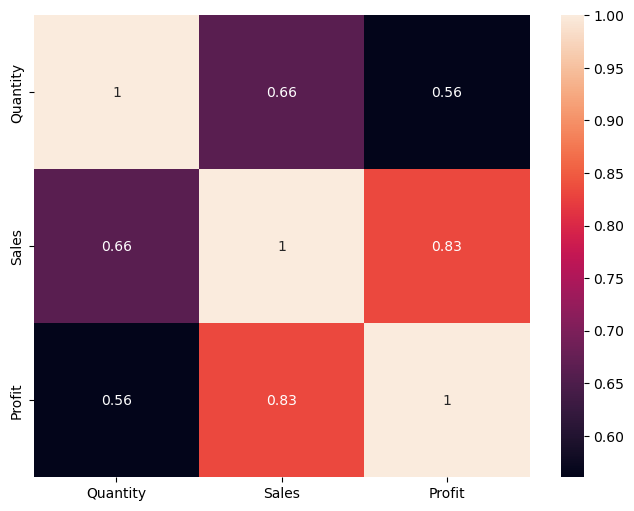

In [13]:
plt.figure(figsize = (8, 6))
sns.heatmap(data = df.corr(numeric_only = True), annot = True)

# Data Cleaning

In [14]:
df.duplicated().sum()

np.int64(0)

IQR method for Sales and Profit

In [15]:
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

lower_sales = max(0, Q1_sales - 1.5 * IQR_sales)
upper_sales = Q3_sales + 1.5 * IQR_sales

# Outliers
sales_outliers = df[(df['Sales'] < lower_sales) | (df['Sales'] > upper_sales)]

sales_outliers

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
32,2023-04-09,Laptop,Electronics,North,9,10773,1907.36
147,2022-10-23,Keyboard,Accessories,West,9,10035,1486.30
153,2024-08-08,Monitor,Accessories,North,9,10530,2387.63
267,2024-01-25,Tablet,Electronics,East,9,10188,2165.78
293,2023-08-08,Monitor,Accessories,North,9,10458,2799.48
379,2022-05-09,Printer,Office,West,9,10656,961.30
455,2023-12-29,Camera,Electronics,West,9,9972,2566.01
846,2024-05-14,Camera,Electronics,West,9,10143,1690.66
977,2024-01-05,Laptop,Electronics,West,9,9783,2347.49
1064,2022-09-15,Keyboard,Accessories,East,9,9810,549.46


In [16]:
Q1_profit = df['Profit'].quantile(0.25)
Q3_profit = df['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

lower_profit = max(0, Q1_profit - 1.5 * IQR_profit)
upper_profit = Q3_profit + 1.5 * IQR_profit

# Outlier
profit_outliers = df[(df['Profit'] < lower_profit) | (df['Profit'] > upper_profit)]
profit_outliers

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
12,2023-12-21,Tablet,Electronics,North,7,7462,2166.17
32,2023-04-09,Laptop,Electronics,North,9,10773,1907.36
55,2023-12-28,Headphones,Accessories,East,7,8155,1587.91
60,2022-09-26,Headphones,Accessories,South,7,6895,1596.35
92,2022-12-14,Camera,Electronics,South,7,7518,1655.91
...,...,...,...,...,...,...,...
3405,2023-07-03,Monitor,Accessories,South,6,6402,1602.79
3411,2022-04-11,Smartphone,Electronics,East,9,8145,2384.42
3468,2022-03-25,Keyboard,Accessories,North,7,7679,2270.08
3490,2023-05-14,Laptop,Electronics,West,9,9702,2771.49


In [17]:
df['Sales'] = np.where(df['Sales'] > upper_sales, upper_sales,
                       np.where(df['Sales'] < lower_sales, lower_sales, df['Sales']))

df['Profit'] = np.where(df['Profit'] > upper_profit, upper_profit,
                        np.where(df['Profit'] < lower_profit, lower_profit, df['Profit']))

# Feature Engineering

In [18]:
df.dtypes

Order Date       object
Product Name     object
Category         object
Region           object
Quantity          int64
Sales           float64
Profit          float64
dtype: object

In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [20]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Day'] = df['Order Date'].dt.day

df.drop(columns = 'Order Date', inplace = True)

In [21]:
df.head()

,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Day
0,Printer,Office,North,4,3640.0,348.93,2024,December,31
1,Mouse,Accessories,East,7,1197.0,106.53,2022,November,27
2,Tablet,Electronics,South,5,5865.0,502.73,2022,May,11
3,Mouse,Accessories,South,2,786.0,202.87,2024,March,16
4,Mouse,Accessories,West,1,509.0,103.28,2022,September,10


In [22]:
df['Quantity'].min()

1

In [23]:
df['Profit per Unit'] = df['Profit'] / df['Quantity']
df['Sales per Unit'] = df['Sales'] / df['Quantity']

In [24]:
df.head()

,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Day,Profit per Unit,Sales per Unit
0,Printer,Office,North,4,3640.0,348.93,2024,December,31,87.232500,910.0
1,Mouse,Accessories,East,7,1197.0,106.53,2022,November,27,15.218571,171.0
2,Tablet,Electronics,South,5,5865.0,502.73,2022,May,11,100.546000,1173.0
3,Mouse,Accessories,South,2,786.0,202.87,2024,March,16,101.435000,393.0
4,Mouse,Accessories,West,1,509.0,103.28,2022,September,10,103.280000,509.0


In [25]:
quantity_threshold = df['Quantity'].median()

df['High_Quantity_Flag'] = np.where(
    df['Quantity'] > quantity_threshold,
    1,
    0
)

df.head()

,Product Name,Category,Region,Quantity,Sales,Profit,Year,Month,Day,Profit per Unit,Sales per Unit,High_Quantity_Flag
0,Printer,Office,North,4,3640.0,348.93,2024,December,31,87.232500,910.0,0
1,Mouse,Accessories,East,7,1197.0,106.53,2022,November,27,15.218571,171.0,1
2,Tablet,Electronics,South,5,5865.0,502.73,2022,May,11,100.546000,1173.0,0
3,Mouse,Accessories,South,2,786.0,202.87,2024,March,16,101.435000,393.0,0
4,Mouse,Accessories,West,1,509.0,103.28,2022,September,10,103.280000,509.0,0


# Feature Selection & Engginering

In [26]:
df.drop(['Product Name', 'Year', 'Day', 'Month'], axis = 1, inplace = True)

In [27]:
df = pd.get_dummies(df, drop_first = True)

In [28]:
df = df.astype(int)

In [29]:
 df.head()

,Quantity,Sales,Profit,Profit per Unit,Sales per Unit,High_Quantity_Flag,Category_Electronics,Category_Office,Region_North,Region_South,Region_West
0,4,3640,348,87,910,0,0,1,1,0,0
1,7,1197,106,15,171,1,0,0,0,0,0
2,5,5865,502,100,1173,0,1,0,0,1,0
3,2,786,202,101,393,0,0,0,0,1,0
4,1,509,103,103,509,0,0,0,0,0,1


In [30]:
numeric_cols = df.select_dtypes(include='number')
numeric_cols.corr()

,Quantity,Sales,Profit,Profit per Unit,Sales per Unit,High_Quantity_Flag,Category_Electronics,Category_Office,Region_North,Region_South,Region_West
Quantity,1.000000,0.663139,0.574913,-0.029774,0.006536,0.864207,0.004205,-0.009758,-0.032341,0.001608,0.015068
Sales,0.663139,1.000000,0.840739,0.460505,0.666193,0.581216,0.003792,0.002682,-0.034670,-0.008533,0.028496
Profit,0.574913,0.840739,1.000000,0.700867,0.558591,0.503098,0.001439,-0.003298,-0.035674,-0.009406,0.028070
Profit per Unit,-0.029774,0.460505,0.700867,1.000000,0.749229,-0.017441,0.000527,0.012873,-0.022981,-0.009393,0.017702
Sales per Unit,0.006536,0.666193,0.558591,0.749229,1.000000,0.018926,-0.006249,0.019706,-0.024730,-0.010362,0.021976
High_Quantity_Flag,0.864207,0.581216,0.503098,-0.017441,0.018926,1.000000,0.012079,-0.013795,-0.029619,-0.005280,0.007256
Category_Electronics,0.004205,0.003792,0.001439,0.000527,-0.006249,0.012079,1.000000,-0.335488,0.002605,-0.030895,0.010536
Category_Office,-0.009758,0.002682,-0.003298,0.012873,0.019706,-0.013795,-0.335488,1.000000,-0.014300,0.015072,0.013843
Region_North,-0.032341,-0.034670,-0.035674,-0.022981,-0.024730,-0.029619,0.002605,-0.014300,1.000000,-0.331021,-0.334782
Region_South,0.001608,-0.008533,-0.009406,-0.009393,-0.010362,-0.005280,-0.030895,0.015072,-0.331021,1.000000,-0.341242


<Axes: >

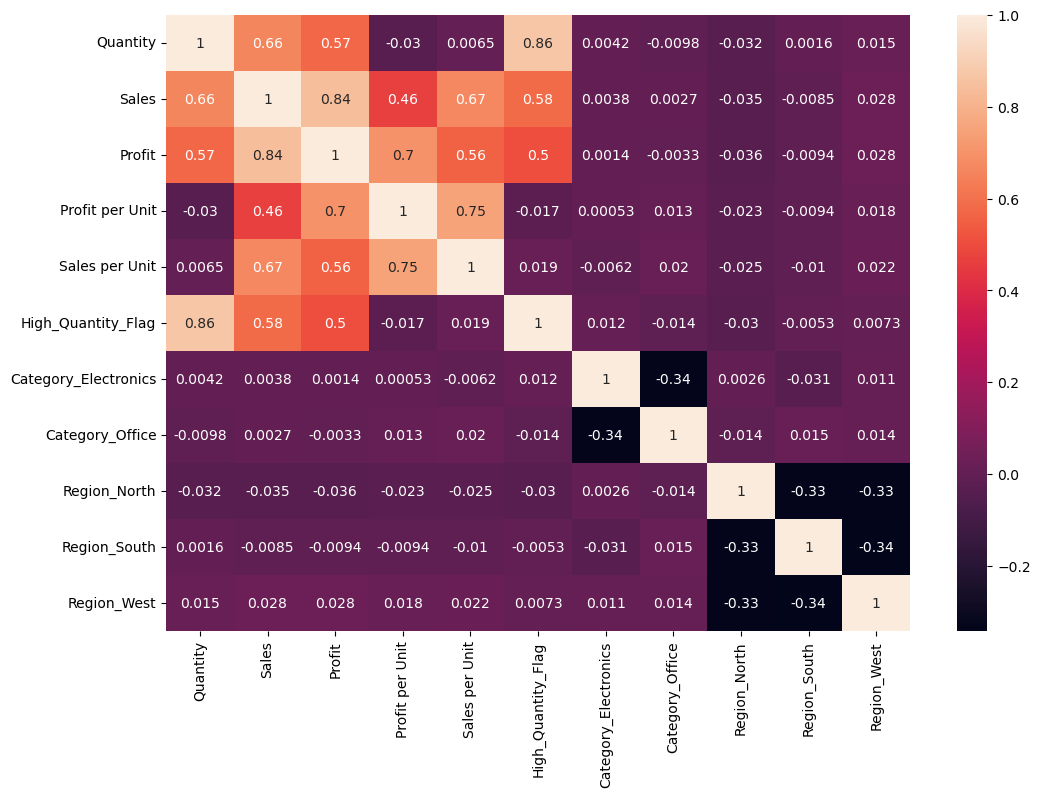

In [31]:
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize = (12, 8))
sns.heatmap(numeric_cols.corr(), annot = True)

In [32]:
dfCleaned = df[['Quantity', 'Sales', 'Profit', 'Profit per Unit', 'Sales per Unit', 'High_Quantity_Flag']].copy()

In [33]:
dfCleaned.head()

,Quantity,Sales,Profit,Profit per Unit,Sales per Unit,High_Quantity_Flag
0,4,3640,348,87,910,0
1,7,1197,106,15,171,1
2,5,5865,502,100,1173,0
3,2,786,202,101,393,0
4,1,509,103,103,509,0


# Encoding

In [34]:
dfCleaned.dtypes

Quantity              int64
Sales                 int64
Profit                int64
Profit per Unit       int64
Sales per Unit        int64
High_Quantity_Flag    int64
dtype: object

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = ['Quantity', 'Sales', 'Profit per Unit', 'Sales per Unit']

dfCleaned[cols] = scaler.fit_transform(dfCleaned[cols])


In [36]:
dfCleaned.head()

,Quantity,Sales,Profit,Profit per Unit,Sales per Unit,High_Quantity_Flag
0,-0.361757,0.245972,348,-0.233713,0.888887,0
1,0.803054,-0.760980,106,-1.260323,-1.344969,1
2,0.026513,1.163069,502,-0.048353,1.683886,0
3,-1.138297,-0.930385,202,-0.034094,-0.673905,0
4,-1.526567,-1.044558,103,-0.005577,-0.323259,0


# Modeling

In [61]:
X = dfCleaned[['Sales', 'Quantity']]
y = dfCleaned['Profit']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1- r2) * (n-1) / (n - p - 1))
adjusted_r2

0.6641685797829965